In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Visualizing datasets

### Why?

* To understand the patterns present in the dataset
* To decide if any additional features need to be added
* To decide how to perform dataset splitting
* To decide which model to use

## Dataset 1 : Linear

In [2]:
linear_data = np.load('linear_data.npy')
print(linear_data.shape)

(100, 2)


In [3]:
linear_x = linear_data[:, 0]
linear_y = linear_data[:, 1]

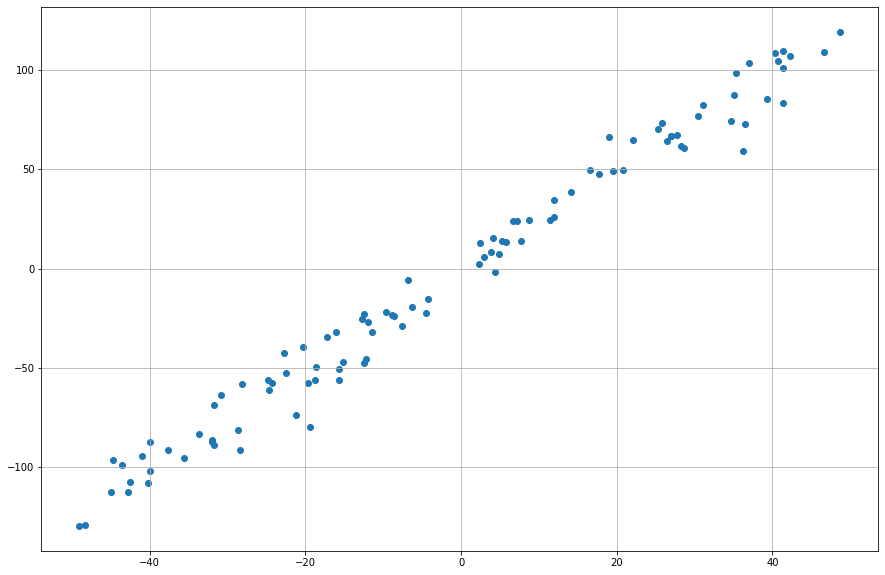

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(linear_x, linear_y)
plt.grid()
plt.show()

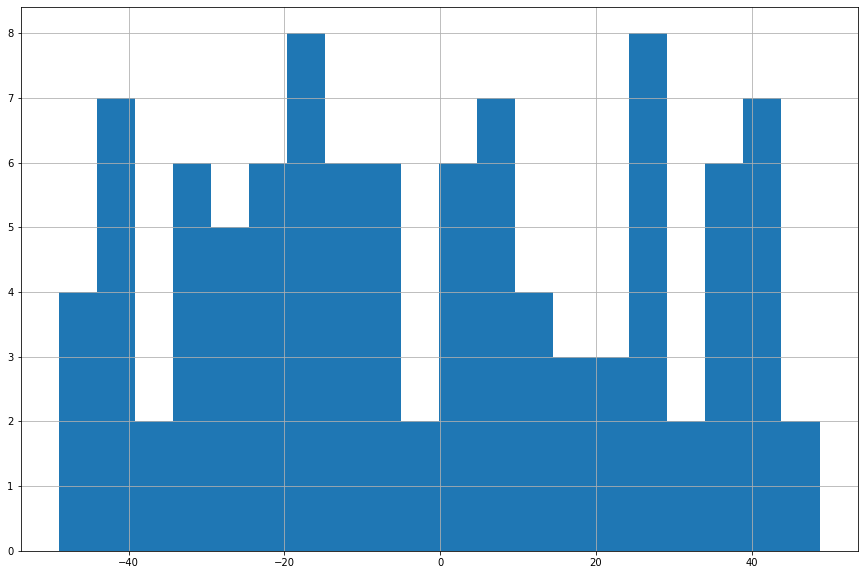

In [5]:
plt.figure(figsize=(15, 10))
plt.hist(linear_x, bins=20)
plt.grid()
plt.show()

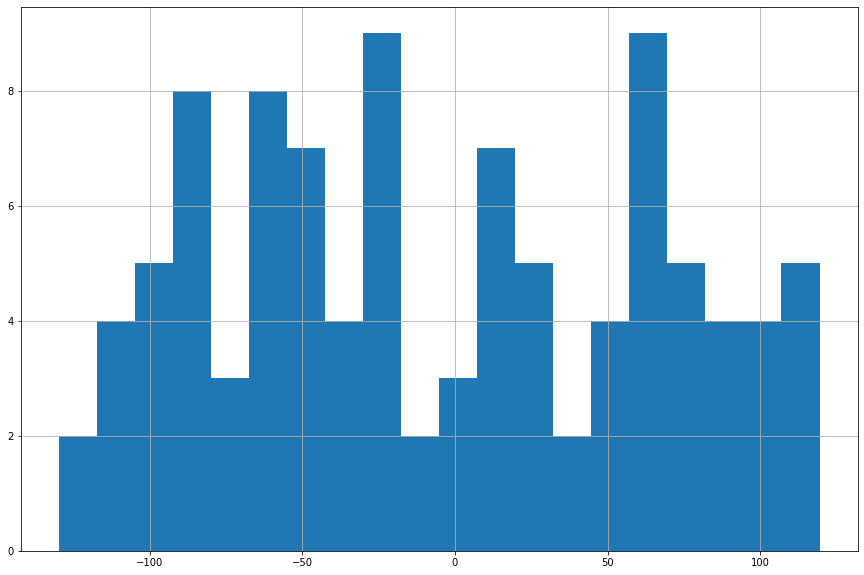

In [6]:
plt.figure(figsize=(15, 10))
plt.hist(linear_y, bins=20)
plt.grid()
plt.show()

## Dataset 2 : Quadratic

In [7]:
quad_data = np.load('quadratic_data.npy')
print(quad_data.shape)

(100, 2)


In [8]:
quad_x = quad_data[:, 0]
quad_y = quad_data[:, 1]

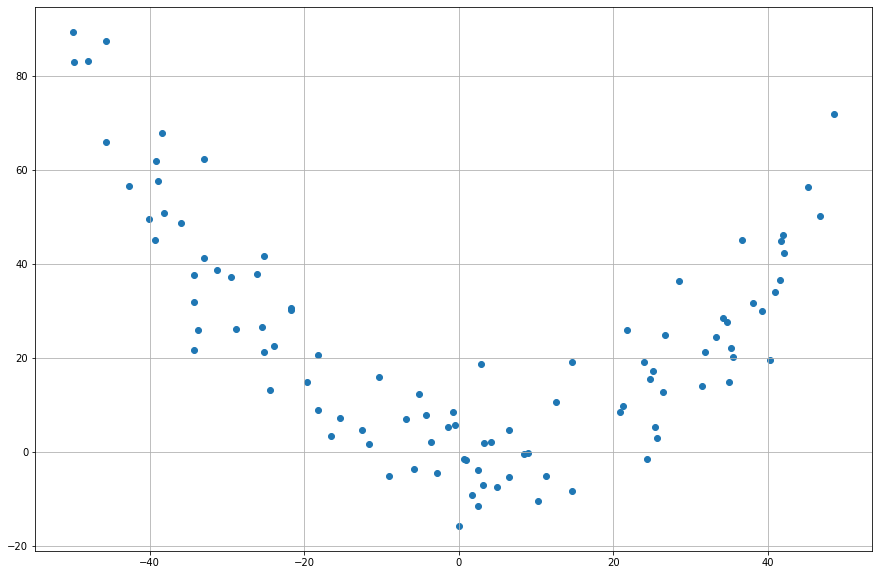

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(quad_x, quad_y)
plt.grid()
plt.show()

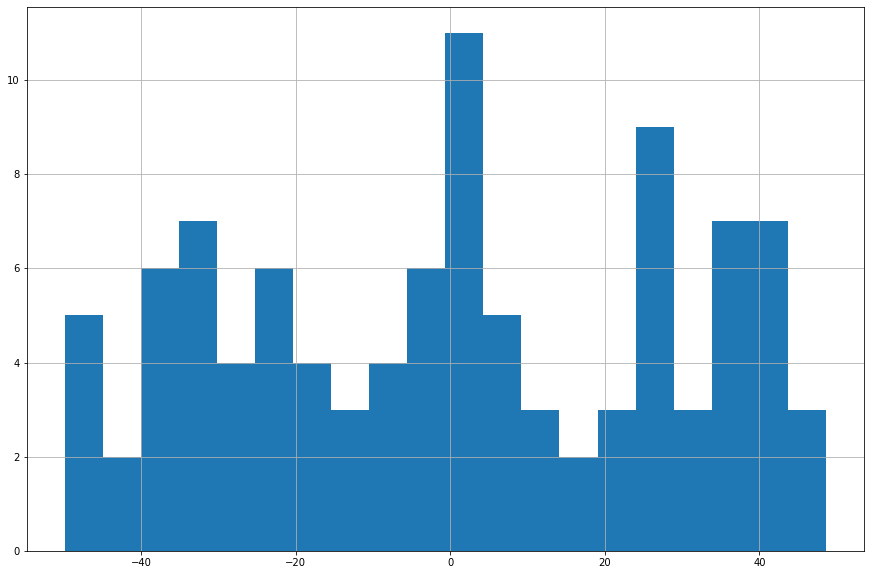

In [10]:
plt.figure(figsize=(15, 10))
plt.hist(quad_x, bins=20)
plt.grid()
plt.show()

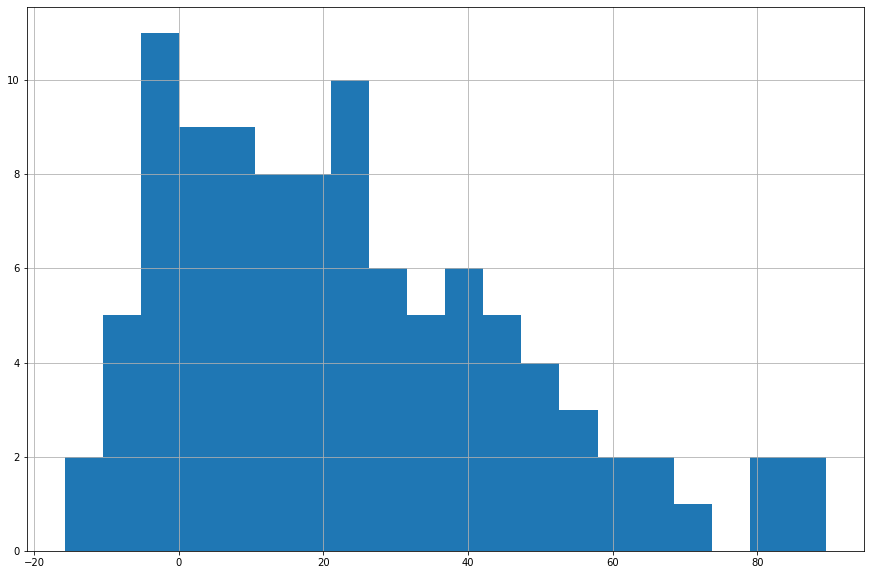

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(quad_y, bins=20)
plt.grid()
plt.show()

## Dataset 3 : Cubic

In [12]:
cubic_data = np.load('cubic_data.npy')
print(cubic_data.shape)

(100, 2)


In [13]:
cubic_x = cubic_data[:, 0]
cubic_y = cubic_data[:, 1]

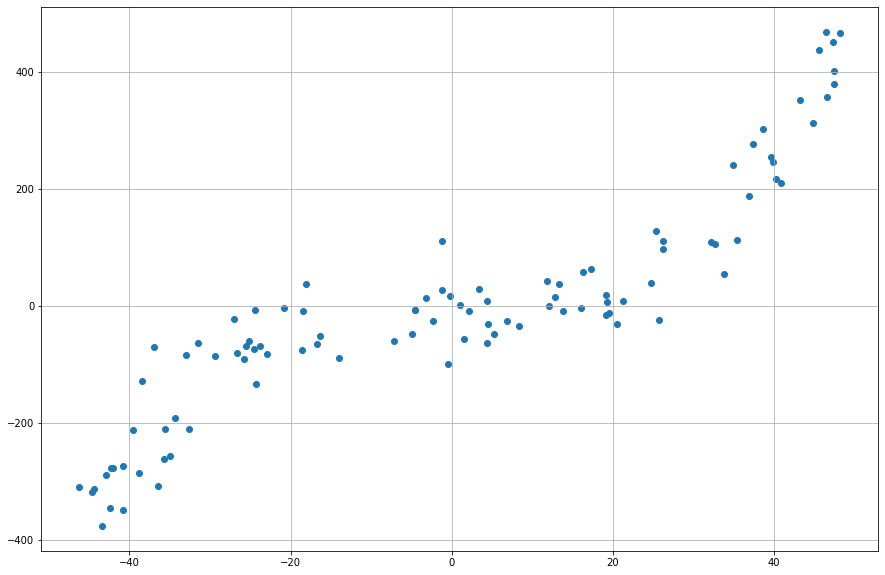

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(cubic_x, cubic_y)
plt.grid()
plt.show()

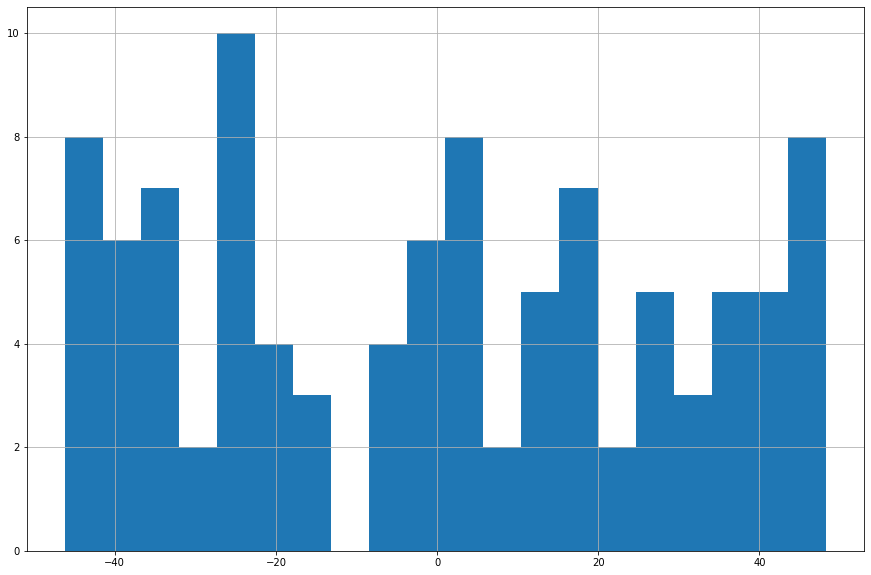

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(cubic_x, bins=20)
plt.grid()
plt.show()

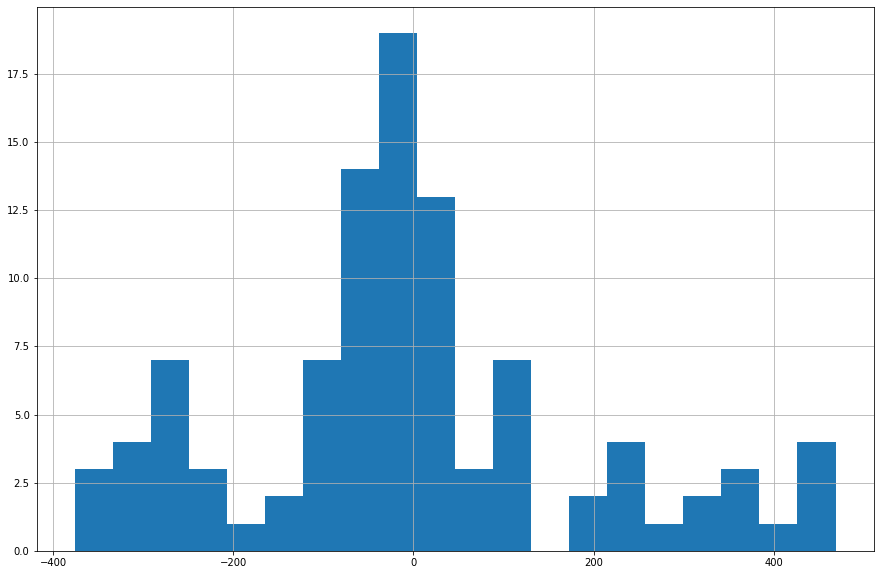

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(cubic_y, bins=20)
plt.grid()
plt.show()

# Partitioning the data

### Why?

* To evaluate the model
* To avoid overfitting

### How?

Typically the data is split into 3 sub-datasets, training, validation and test

**Training:** Usually the largest component, used to train the model

**Validation:** Usually the smallest component, used to decide when to stop training

**Test:** Used to evaluate the trained model and determine performance metrics

A typical split is 60:20:20

### Is there a better way?

**Yes!**, cross validation treats different segments as pairs of training and validation set.
However, in larger datasets it is linearly more expensive to train these additional models often for practically no improvement in performance and is therefore often not done. It is a good idea to do cross validation with small datasets

In [17]:
linear_bucket_1_idx = np.where(linear_x < 0)[0]
linear_bucket_2_idx = np.where(linear_x >= 0)[0]

print(len(linear_bucket_1_idx), len(linear_bucket_2_idx))

52 48


In [18]:
train_idx = np.r_[linear_bucket_1_idx[:41], linear_bucket_2_idx[:39]]
test_idx = np.r_[linear_bucket_1_idx[41:], linear_bucket_2_idx[39:]]

print(len(train_idx), len(test_idx))

80 20


In [19]:
linear_train_x = linear_x[train_idx]
linear_train_y = linear_y[train_idx]

linear_test_x = linear_x[test_idx]
linear_test_y = linear_y[test_idx]

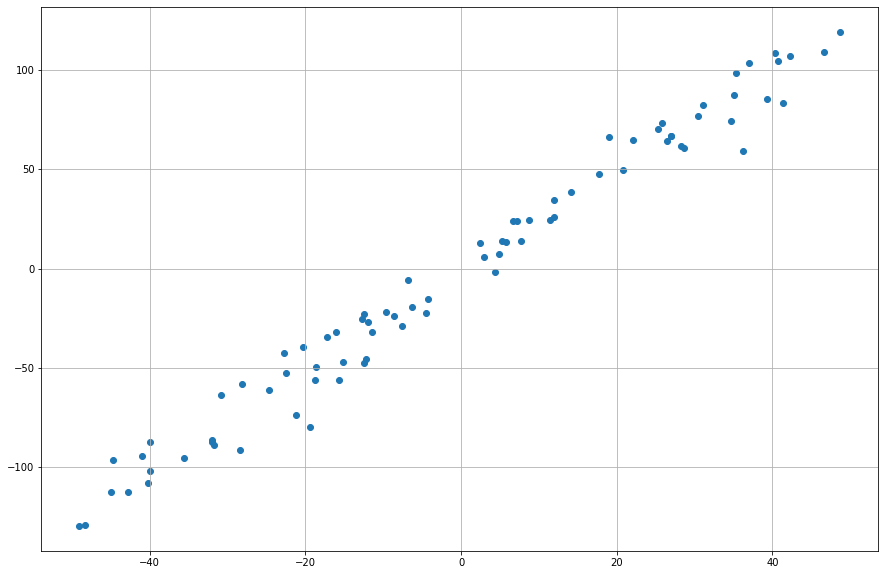

In [20]:
plt.figure(figsize=(15, 10))
plt.scatter(linear_train_x, linear_train_y)
plt.grid()
plt.show()

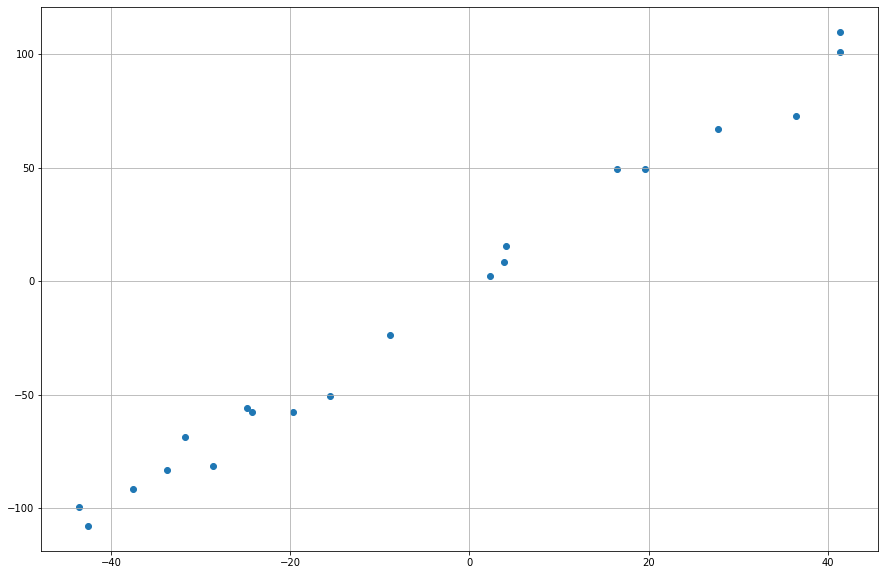

In [21]:
plt.figure(figsize=(15, 10))
plt.scatter(linear_test_x, linear_test_y)
plt.grid()
plt.show()

# Training a model on given data

In [22]:
from sklearn.linear_model import LinearRegression

## Dataset 1 : Linear

In [23]:
model = LinearRegression()
model.fit(linear_train_x[:, np.newaxis], linear_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_

array([2.50186557])

In [25]:
model.intercept_

-1.5421027675673564

In [26]:
demo_x = np.arange(-50, 50, 0.5)
demo_y = model.predict(demo_x[:, np.newaxis])

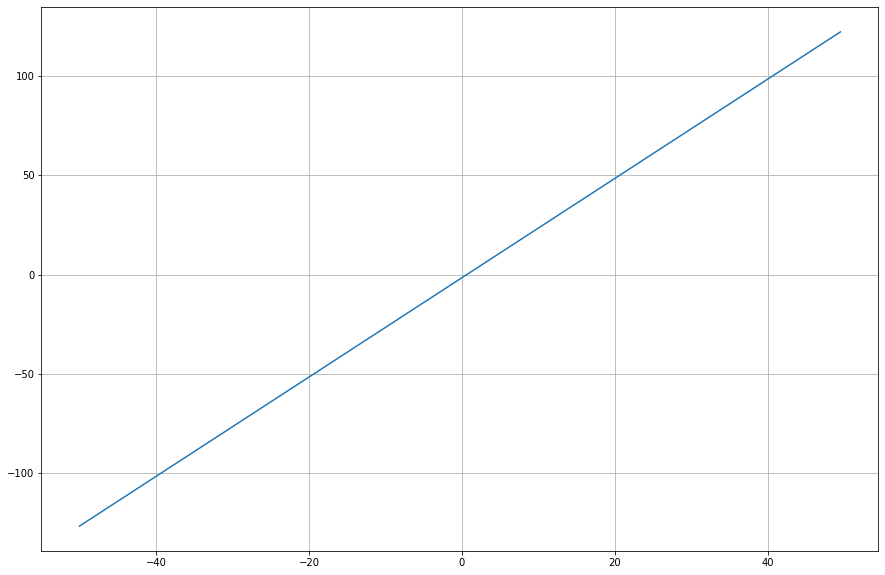

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(demo_x, demo_y)
plt.grid()
plt.show()

In [28]:
linear_test_pred = model.predict(linear_test_x[:, np.newaxis])

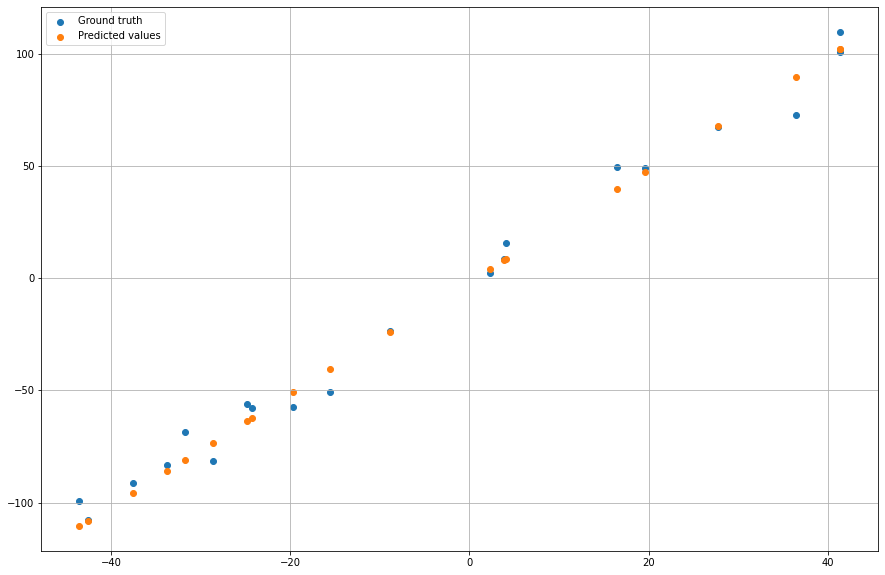

In [29]:
plt.figure(figsize=(15, 10))
plt.scatter(linear_test_x, linear_test_y, label="Ground truth")
plt.scatter(linear_test_x, linear_test_pred, label="Predicted values")
plt.grid()
plt.legend()
plt.show()

# Evaluate

In [30]:
# Mean absolute error

np.mean(np.abs(linear_test_pred - linear_test_y))

5.778949241442158

In [31]:
# Mean squared error

np.mean(np.power(linear_test_pred - linear_test_y, 2))

54.5747621688134

In [32]:
# Root mean squared error

np.sqrt(np.mean(np.power(linear_test_pred - linear_test_y, 2)))

7.387473327790321

In [33]:
# Mean absolute percentage error

np.mean(np.abs(np.divide(linear_test_pred - linear_test_y, linear_test_y) * 100))

13.912104419167957

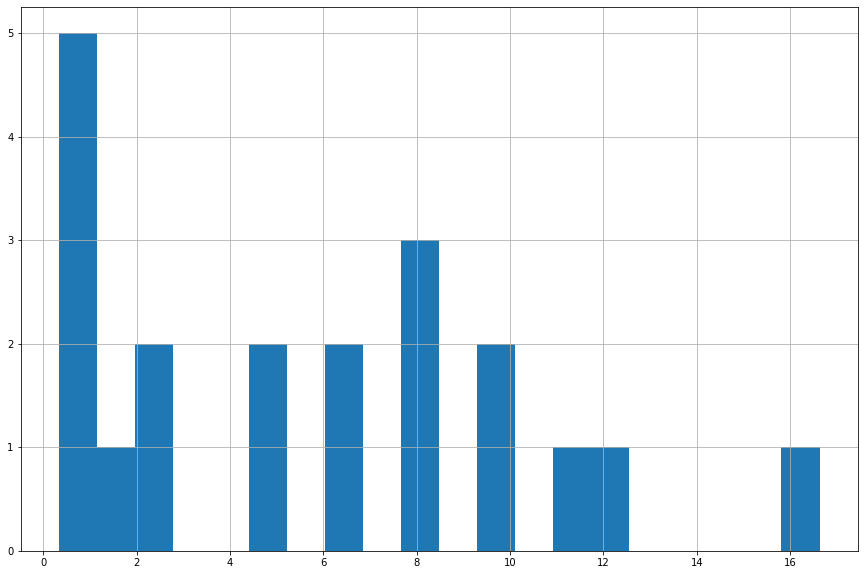

In [34]:
plt.figure(figsize=(15, 10))
plt.hist(np.abs(linear_test_pred - linear_test_y), bins=20)
plt.grid()
plt.show()

# Hands-on from scratch on unknown data

In [35]:
linear_data = np.load('unknown_data.npy')
print(linear_data.shape)

(100, 2)


In [36]:
linear_x = linear_data[:, 0]
linear_y = linear_data[:, 1]

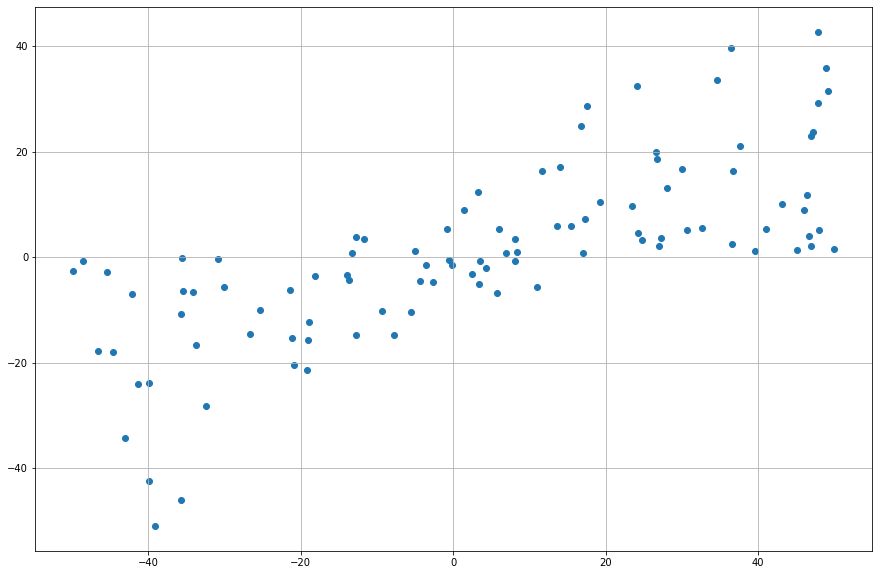

In [37]:
plt.figure(figsize=(15, 10))
plt.scatter(linear_x, linear_y)
plt.grid()
plt.show()

In [38]:
linear_bucket_1_idx = np.where(linear_x < 0)[0]
linear_bucket_2_idx = np.where(linear_x >= 0)[0]

print(len(linear_bucket_1_idx), len(linear_bucket_2_idx))

45 55


In [39]:
train_idx = np.r_[linear_bucket_1_idx[:36], linear_bucket_2_idx[:44]]
test_idx = np.r_[linear_bucket_1_idx[36:], linear_bucket_2_idx[44:]]

print(len(train_idx), len(test_idx))

80 20


In [40]:
linear_train_x = linear_x[train_idx]
linear_train_y = linear_y[train_idx]

linear_test_x = linear_x[test_idx]
linear_test_y = linear_y[test_idx]

In [41]:
model = LinearRegression()
model.fit(linear_train_x[:, np.newaxis], linear_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
linear_test_pred = model.predict(linear_test_x[:, np.newaxis])

In [43]:
demo_x = np.arange(-50, 50, 0.5)
demo_y = model.predict(demo_x[:, np.newaxis])

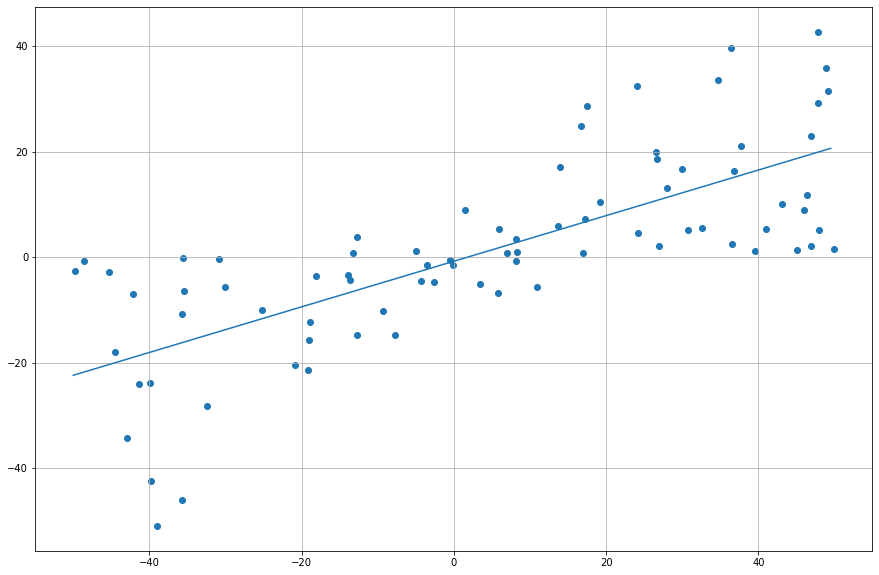

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(demo_x, demo_y)
plt.scatter(linear_train_x, linear_train_y)
plt.grid()
plt.show()

In [46]:
# Mean absolute error

np.mean(np.abs(linear_test_pred - linear_test_y))

5.6638042998432745

In [47]:
# Mean squared error

np.mean(np.power(linear_test_pred - linear_test_y, 2))

48.91717869521448

In [48]:
# Root mean squared error

np.sqrt(np.mean(np.power(linear_test_pred - linear_test_y, 2)))

6.994081690630621

In [49]:
# Mean absolute percentage error

np.mean(np.abs(np.divide(linear_test_pred - linear_test_y, linear_test_y) * 100))

108.67929468720504

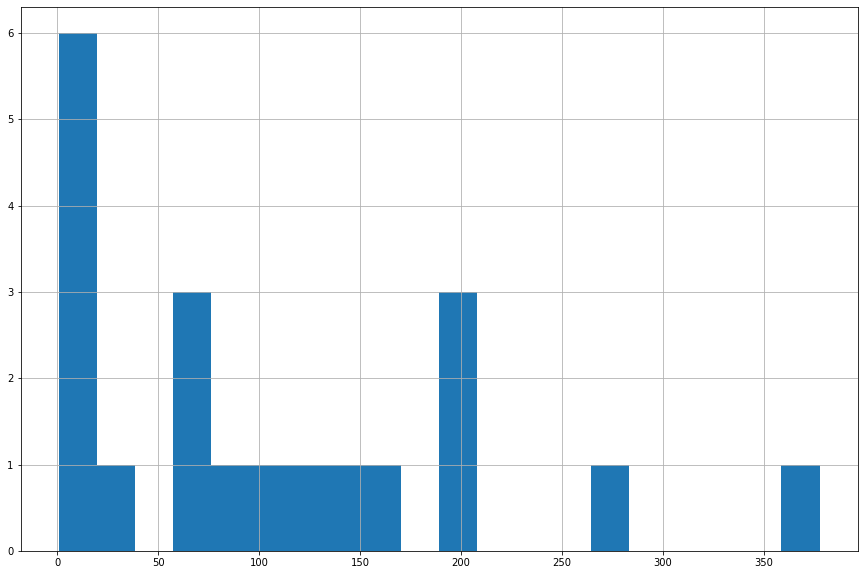

In [50]:
plt.figure(figsize=(15, 10))
plt.hist(np.abs(np.divide(linear_test_pred - linear_test_y, linear_test_y) * 100), bins=20)
plt.grid()
plt.show()

In [ ]:
–